# Fitting exponential truncated power law using Python

There is an equation of exponential truncated power law in the article [^1] below:

$$P(r_g) = (r_g + r_g^0)^{-\beta_r} e^{-r_g/K}$$


[^1]: Gonzalez, M. C., Hidalgo, C. A., & Barabasi, A. L. (2008). Understanding individual human mobility patterns. Nature, 453(7196), 779-782.



http://stackoverflow.com/questions/43444794/how-to-estimate-the-parameters-of-an-exponential-truncated-power-law

In [1]:
import numpy as np
rg = np.array([ 20.7863444 ,   9.40547933,   8.70934714,   8.62690145,
     7.16978087,   7.02575052,   6.45280959,   6.44755478,
     5.16630287,   5.16092884,   5.15618737,   5.05610068,
     4.87023561,   4.66753197,   4.41807645,   4.2635671 ,
     3.54454372,   2.7087178 ,   2.39016885,   1.9483156 ,
     1.78393238,   1.75432688,   1.12789787,   1.02098332,
     0.92653501,   0.32586582,   0.1514813 ,   0.09722761,
     0.        ,   0.        ])

prg = np.array([ 0.        ,  0.03448276,  0.06896552,  0.10344828,  0.13793103,
    0.17241379,  0.20689655,  0.24137931,  0.27586207,  0.31034483,
    0.34482759,  0.37931034,  0.4137931 ,  0.44827586,  0.48275862,
    0.51724138,  0.55172414,  0.5862069 ,  0.62068966,  0.65517241,
    0.68965517,  0.72413793,  0.75862069,  0.79310345,  0.82758621,
    0.86206897,  0.89655172,  0.93103448,  0.96551724,  1.        ])

In [2]:
# calculate P(rg)
rg = sorted(rg, reverse=True)
rg = np.array(rg)
prg = np.arange(len(rg)) / float(len(rg)-1)

In [3]:
np.arange(10)/9.0

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

In [4]:
float(10-1)

9.0

In [5]:
def func(rg, rg0, beta, K):
    return (rg + rg0) ** (-beta) * np.exp(-rg / K)

from scipy import optimize
popt, pcov = optimize.curve_fit(func, rg, prg)
print popt
print pcov


[ 0.666261   -0.16158776  3.72188538]
[[ 0.01888237 -0.0060332  -0.03453856]
 [-0.0060332   0.00558652  0.02962351]
 [-0.03453856  0.02962351  0.16733668]]


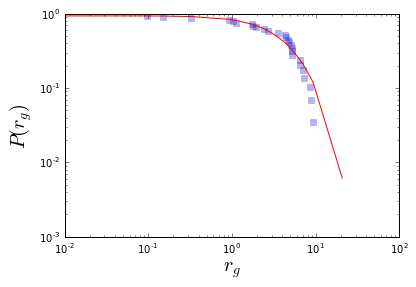

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(rg, prg, 'bs', alpha = 0.3)
plt.plot(rg, (rg+popt[0])**-(popt[1])*np.exp(-rg/popt[2]), 'r-' )
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$r_g$', fontsize = 20)
plt.ylabel('$P(r_g)$', fontsize = 20)
plt.show()